In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('Lab4_auto-mpg.csv')
data.head()

Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
X = data.iloc[:, [1,2,4,5,6,7]].values

Y = data.iloc[:, [0]].values

#print(X)
#print(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(318, 6) (80, 6)
(318, 1) (80, 1)


In [ ]:
X_min = X_train.min(axis=0, keepdims = True)
X_max = X_train.max(axis=0, keepdims = True)
print(X_max)
print(X_min)

[[8.00e+00 4.55e+02 5.14e+03 2.48e+01 8.20e+01 3.00e+00]]
[[3.000e+00 6.800e+01 1.613e+03 8.000e+00 7.000e+01 1.000e+00]]


In [ ]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
print(X_train_scaled.max(), X_train_scaled.min())

1.0 0.0


In [ ]:
X_test_scaled = (X_test - X_min)/(X_max - X_min)
print(X_test_scaled.max(), X_test_scaled.min())

1.0 0.0


In [ ]:
#Y_mean = Y_train.mean()
#Y_std = Y_train.std()
Y_min = Y_train.min(axis=0, keepdims = True)
Y_max = Y_train.max(axis=0, keepdims = True)

Y_train_scaled = (Y_train - Y_min)/(Y_max - Y_min)

Y_test_scaled = (Y_test - Y_min)/(Y_max - Y_min)

print(Y_train_scaled.max(), Y_train_scaled.min())
print(Y_test_scaled.max(), Y_test_scaled.min())

1.0 0.0
0.9308510638297872 0.026595744680851064


In [ ]:
def predict(X, W):
    Y_pred = np.dot(X, W.T)
    return Y_pred

In [ ]:
def loss(X, Y, W):
    Y_pred = predict(X, W)
    #return np.mean((Y_pred - Y)**2)
    return 1 / (2 * Y.size) * np.sum((Y_pred - Y)**2)

In [ ]:
def grad_loss(X, Y, W):
    Y_pred = predict(X, W)
    delta = Y_pred - Y
    dW = np.dot(X.T, delta)
    return dW.T
    #dW = np.dot(delta,X.T)
    #return dW

In [ ]:
def train_step(X, y, w, lr, alpha = None):
    dw = grad_loss(X, y, w)
    if(alpha==None):
      w_new = w - lr * dw
    else:
      w_new = w - lr * (dw + alpha * w)
    return w_new

In [ ]:
X_train_one = np.hstack((X_train_scaled,
                        np.ones((X_train_scaled.shape[0], 1))))
X_test_one = np.hstack((X_test_scaled,
                        np.ones((X_test_scaled.shape[0], 1))))

print(X_train_one)

[[1.         0.60981912 0.51601928 ... 0.         0.         1.        ]
 [0.2        0.0749354  0.1465835  ... 0.         1.         1.        ]
 [0.2        0.05943152 0.11681316 ... 1.         1.         1.        ]
 ...
 [0.2        0.17054264 0.25574142 ... 0.66666667 1.         1.        ]
 [0.2        0.05426357 0.12390133 ... 0.91666667 1.         1.        ]
 [0.2        0.0749354  0.09554862 ... 0.25       0.5        1.        ]]


In [ ]:
X_train_one.shape

(318, 7)

In [ ]:
w = np.zeros((1,X_train_scaled.shape[1]))
w_1 = np.zeros((1,X_train_one.shape[1]))
n_epoch = 10000
lr = 8.0e-4
his = []
his.append(loss(X_train_scaled, Y_train_scaled , w))
his_1 = []
his_1.append(loss(X_train_one, Y_train_scaled , w_1))
hisw=[]
for _ in range(n_epoch):
    w = train_step(X_train_scaled, Y_train_scaled , w, lr)
    w_1 = train_step(X_train_one, Y_train_scaled , w_1, lr)
    #w = train_step(X_train_scaled, X_test_scaled , w, lr)
    #w_1 = train_step(X_train_one, X_test_one , w_1, lr)
    l = loss(X_train_scaled, Y_train_scaled , w)
    l_1 = loss(X_train_one, Y_train_scaled , w_1)
    his.append(l)
    his_1.append(l_1)
    hisw.append(w_1)
print(min(his))
print(min(his_1))

0.0073595856659318315
0.004133192521384293


In [ ]:
def rmse(Y_pred, Y):
    return np.sqrt(np.mean((Y_pred - Y)**2))
def mae(Y_pred, Y):
    return np.mean(np.abs(Y_pred - Y))

def r2(Y_pred, Y):
    return 1 - np.sum((Y_pred - Y)**2)/np.sum((Y - Y.mean())**2)

In [ ]:
y_pre_1 = predict(X_test_one, w_1)
print("RMSE: ", rmse(y_pre_1, Y_test_scaled))
print("MAE: ", mae(y_pre_1, Y_test_scaled))
print("R2: ", r2(y_pre_1, Y_test_scaled))

RMSE:  0.07621034671654021
MAE:  0.05975602173973702
R2:  0.8472812879965981


In [ ]:
y_pre = predict(X_test, w)
print("RMSE: ", rmse(y_pre, Y_test_scaled))
print("MAE: ", mae(y_pre, Y_test_scaled))
print("R2: ", r2(y_pre, Y_test_scaled))

RMSE:  1995.8616234411445
MAE:  1917.349298856363
R2:  -104743053.11552052


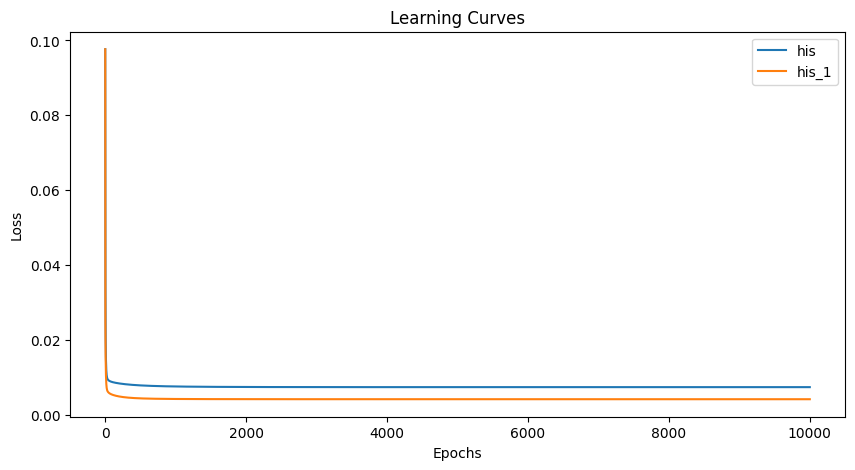

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(his, label='his')
plt.plot(his_1, label='his_1')

plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
alpha = np.linspace(0,1,10)
eval_test = []
eval_train = []
lr = 8.0e-4
n_epochs = 10000
for al in alpha:
  w_1 = np.zeros((1,X_train_one.shape[1]))
  for _ in range (n_epochs):
    w_1 = train_step(X_train_one, Y_train_scaled, w_1, lr, al)

  y_pre_test = predict(X_test_one, w_1)
  r2_test = r2(y_pre_test, Y_test_scaled)

  y_pre_train = predict(X_train_one, w_1)
  r2_train = r2(y_pre_train, Y_train_scaled)
  eval_test.append(r2_test)
  eval_train.append(r2_train)


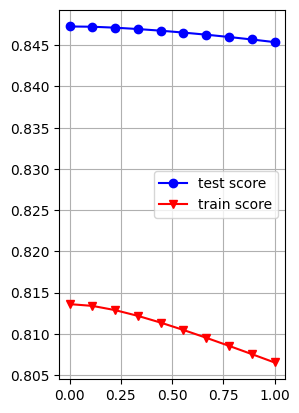

In [ ]:
plt.subplot(11*11)
plt.plot(alpha, eval_test, '-o', c='b', label="test score")
plt.plot(alpha, eval_train, '-v', c='r', label="train score")
plt.grid()
plt.legend()

In [ ]:
#Mô hình đã chạy ra kết quả và không bị over-fitting, với alpha = 0, mô hình có khả năng dự đoán tốt nhất